# Example Notebook for Correcting and loading FastCCD Images

This example reads data from the FastCCD and corrects and rotates the images. Included are some
example of widgets to interact with the data

## Getting Started

Load the ``databroker`` moudle, ``csxtools`` and various other dependencies

In [1]:
import numpy as np
from databroker import DataBroker, get_table
from csxtools.utils import get_fastccd_images, get_images_to_4D
from csxtools.ipynb import image_stack_to_movie, show_image_stack
%matplotlib inline
from matplotlib import pyplot as plt

Set the logger level to info to see logging output

In [2]:
import logging
logging.getLogger().setLevel(logging.INFO)

## Get the data headers from the DataBroker!

In [3]:
bgnd = DataBroker['ce5042b7-00ae-49ca-9b11-b10c5661aaaa'] #[52440]

INFO:databroker.databroker:Interpreting key = ce5042b7-00ae-49ca-9b11-b10c5661aaaa as a str


In [4]:
data = DataBroker['b2596f8e-d220-4aea-8a55-8ccb17cbdacc'] #[52436]

INFO:databroker.databroker:Interpreting key = b2596f8e-d220-4aea-8a55-8ccb17cbdacc as a str


## Correct the FastCCD Images

Now correct the CCD images, using only a single background image. 

In the future this should be taken from the metadata associated with the data, or from the darkfield entry

First lets just look at the background stack as a "lightfield"

In [5]:
images = get_fastccd_images(data, (bgnd, None, None), tag='fccd_image_lightfield')

INFO:csxtools.utils:Took 5.836 seconds to read data using get_images
INFO:csxtools.utils:Image conversion took 31.551 seconds
INFO:csxtools.fastccd.images:Correcting image stack of shape (1, 1200, 960, 960)
INFO:csxtools.fastccd.images:Not correcting for darkfield. No input.
INFO:csxtools.fastccd.images:Not correcting for flatfield. No input.
INFO:csxtools.fastccd.images:Corrected image stack in 0.684 seconds
INFO:csxtools.utils:Mean of image stack took 5.410 seconds
INFO:csxtools.utils:Computed dark images in 43.556 seconds
INFO:csxtools.utils:Took 2.848 seconds to read data using get_images


## Format of returned object

The returned `images` object is a 4D stack of images of shape `(N, M, y, x)` where `N` is the number of events. This is - for example - the number of data points in a scan. `M` is the number of images collected at each point, while `y` and `x` are the size of the CCD chip.

As the data was collected as a single `ct()`, there is only one event. Lets select that. 

In [6]:
stack = images[0]

INFO:csxtools.fastccd.images:Correcting image stack of shape (1200, 960, 960)
INFO:csxtools.fastccd.images:Not correcting for flatfield. No input.
INFO:csxtools.fastccd.images:Corrected image stack in 0.682 seconds


We can use this as a PIMS object, or we could convert it to a image stack using the `get_images_to_4D()` function

In [7]:
arr = get_images_to_4D(stack)
arr.shape

(1200, 960, 960)

In [8]:
type(arr)

numpy.ndarray

In [9]:
arr[0] # The first image, corrected

array([[ 17.7734375 ,  27.36669922,  19.68994141, ...,  15.08422852,
         21.79077148,  16.77246094],
       [ 14.80004883,  16.87573242,  29.84326172, ...,  12.10839844,
         11.42260742,  10.31494141],
       [ 19.51660156,  15.24658203,  12.3425293 , ...,  13.12011719,
         28.76489258,  16.87329102],
       ..., 
       [ 18.60742188,  17.8984375 ,   3.64916992, ...,  19.54492188,
         15.02075195,  13.25585938],
       [  5.88085938,  14.5       ,   5.63842773, ...,  17.73339844,
         18.64990234,  13.80078125],
       [  8.1484375 ,  19.43579102,   4.26928711, ...,  23.22094727,
         21.28491211,   7.49414062]], dtype=float32)

## Now lets do an interactive plotting widget!

We can, however use the pims object in most functions to look at the data. There are a couple of nice interactive objects which can be used to look at image stacks.

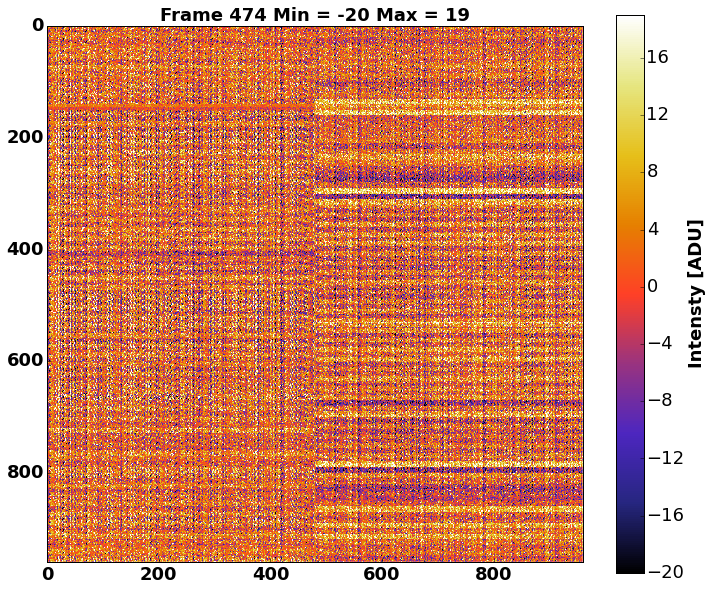

In [10]:
show_image_stack(stack, (-100, 100))

## And lets do a movie of the stack of images
This produces an HTML5 movie which can be viewed in most browsers

In [11]:
image_stack_to_movie(images[0], frames=10, figsize=(12, 10), vmin=-20, vmax=20)

INFO:csxtools.fastccd.images:Correcting image stack of shape (1200, 960, 960)
INFO:csxtools.fastccd.images:Not correcting for flatfield. No input.
INFO:csxtools.fastccd.images:Corrected image stack in 0.715 seconds


What version are we running?

In [12]:
import csxtools
csxtools.__version__

'0.1.1+15.g64c5f9a.dirty'